### Подключаем пакет

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Кейс "чаевые"
### Загрузка данных и их первичная проверка

In [2]:
# Загрузим данные
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [4]:
# Статистика по численным столбцам
# ваш код\
tips.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
# Посчитаем число строк
# ваш код

tips.shape[0]

244

In [11]:
# Проверим на наличие NaN в столбцах
# Кстати а зачем это делать?
# ваш код

tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Простая визуализация

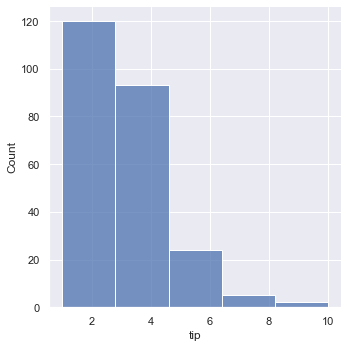

In [14]:
# посмотрим на данные
# bins= 5, 10, 20,30
# почему такая разича в картинках, почему пила, какова причина?
sns.set(); #
sns.displot(tips['tip'], kde=False, bins=5);

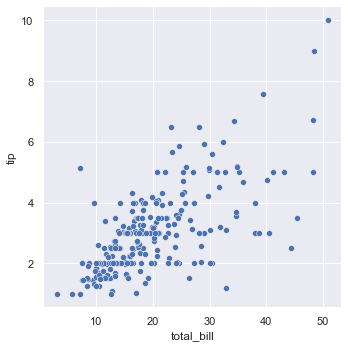

In [13]:
sns.relplot(x="total_bill", y="tip", data=tips);

## Кто больше? Курящие или некурящие?

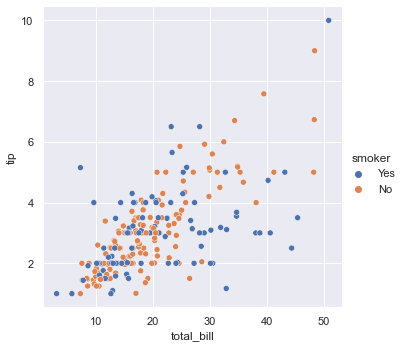

In [15]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

No handles with labels found to put in legend.


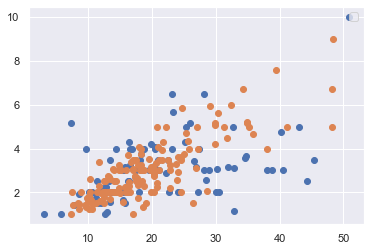

In [22]:
# создать smoker_yes для курящих
# ваш код

smoker_yes = tips[tips['smoker'] == 'Yes']

# создать smoker_no для некурящих
# ваш код

smoker_no = tips[tips['smoker'] == 'No']

# создать похожее в matplotlib
# ваш код
fig,ax = plt.subplots()
plt.scatter(x = smoker_yes['total_bill'], y = smoker_yes['tip']);
plt.scatter(x = smoker_no['total_bill'], y = smoker_no['tip']);

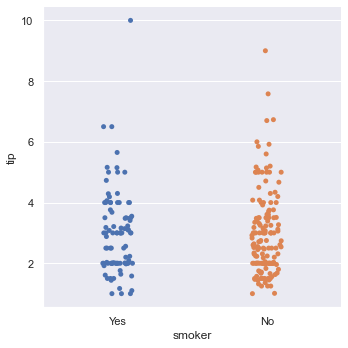

In [17]:
# а так уже проще только в sns
sns.catplot(x="smoker", y="tip", order=["Yes", "No"], data=tips);

## Заглянем глубже
### Посмотрим проценты чаевых от счета

In [26]:
# создадим столбец tip_pct впишем код и посмотрим на 5 первых строк
# ваш код

tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


### Золотое время и в каком зале лучше?

In [30]:
# агрегируем по дням недели и курящим среднею доходность чаевых
# ваш код
tips.groupby(['day', 'smoker'])['tip_pct'].mean()

day   smoker
Thur  Yes       16.386327
      No        16.029808
Fri   Yes       17.478305
      No        15.165044
Sat   Yes       14.790607
      No        15.804766
Sun   Yes       18.725032
      No        16.011294
Name: tip_pct, dtype: float64

In [33]:
# агрегируем по дням недели и курящим средний процент чаевых с разбросом
# ваш код
tips.groupby(['day', 'smoker'])['tip_pct'].agg(['mean', 'std'])

mean        std
day  smoker                      
Thur Yes     16.386327   3.938881
     No      16.029808   3.877420
Fri  Yes     17.478305   5.129267
     No      15.165044   2.812295
Sat  Yes     14.790607   6.137495
     No      15.804766   3.976730
Sun  Yes     18.725032  15.413424
     No      16.011294   4.234723

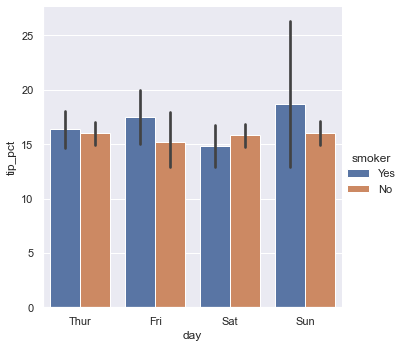

In [34]:
sns.catplot(x="day", y="tip_pct", hue="smoker", data=tips, kind="bar");

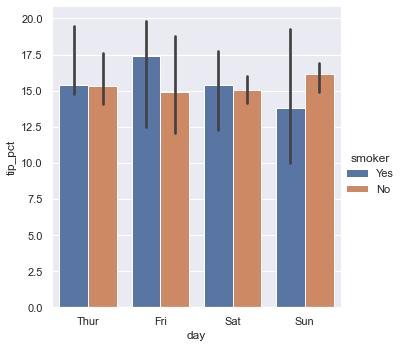

In [39]:
# стоп, а если разброс нужен не относительно mean а median?
# ваш код

sns.catplot(x="day", y="tip_pct", hue="smoker", data=tips, kind="bar", estimator = np.median);

In [45]:
# агрегируем по значениям и отберем значение счета + проценты 
# ваш код
tips.groupby(['day', 'smoker'])['total_bill', 'tip_pct'].agg(['count', np.mean, 'max', sum])

C:\Users\arakh\AppData\Local\Temp/ipykernel_52484/1102246824.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tips.groupby(['day', 'smoker'])['total_bill', 'tip_pct'].agg(['count', np.mean, 'max', sum])


total_bill                            tip_pct             \
                 count       mean    max      sum   count       mean   
day  smoker                                                            
Thur Yes            17  19.190588  43.11   326.24      17  16.386327   
     No             45  17.113111  41.19   770.09      45  16.029808   
Fri  Yes            15  16.813333  40.17   252.20      15  17.478305   
     No              4  18.420000  22.75    73.68       4  15.165044   
Sat  Yes            42  21.276667  50.81   893.62      42  14.790607   
     No             45  19.661778  48.33   884.78      45  15.804766   
Sun  Yes            19  24.120000  45.35   458.28      19  18.725032   
     No             57  20.506667  48.17  1168.88      57  16.011294   

                                    
                   max         sum  
day  smoker                         
Thur Yes     24.125452  278.567563  
     No      26.631158  721.341368  
Fri  Yes     26.348039  262.174578  
     No      18.773467   60.660177  
Sat  Yes     32.573290  621.205474  
     No      29.198966  711.214459  
Sun  Yes     71.034483  355.775601  
     No      25.267250  912.643775

In [48]:
# Сколько было обслужено, и какие чаевые были максимальны?
# ваш код
tips.groupby(['day', 'smoker']).agg({'size' : 'count', 'tip' : max})

size    tip
day  smoker             
Thur Yes       17   5.00
     No        45   6.70
Fri  Yes       15   4.73
     No         4   3.50
Sat  Yes       42  10.00
     No        45   9.00
Sun  Yes       19   6.50
     No        57   6.00

In [52]:
# статистика по прочентам чаевых (min,max,mean,std) и количество обслуженных
# ваш код
tips.groupby(['day', 'smoker']).agg({'tip_pct' : ['min','max','mean','std'], 'size' : 'count'})

tip_pct                                   size
                   min        max       mean        std count
day  smoker                                                  
Thur Yes      9.001406  24.125452  16.386327   3.938881    17
     No       7.296137  26.631158  16.029808   3.877420    45
Fri  Yes     10.355540  26.348039  17.478305   5.129267    15
     No      12.038523  18.773467  15.165044   2.812295     4
Sat  Yes      3.563814  32.573290  14.790607   6.137495    42
     No       5.679667  29.198966  15.804766   3.976730    45
Sun  Yes      6.565988  71.034483  18.725032  15.413424    19
     No       5.944673  25.267250  16.011294   4.234723    57

### Рыба моей мечты (лучший клиент)

In [53]:
# проиндексируем средние по дням и курильшикам данные
tips.groupby(['day','smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Thur,Yes,19.190588,3.030000,2.352941,16.386327
1,Thur,No,17.113111,2.673778,2.488889,16.029808
2,Fri,Yes,16.813333,2.714000,2.066667,17.478305
3,Fri,No,18.420000,2.812500,2.250000,15.165044
4,Sat,Yes,21.276667,2.875476,2.476190,14.790607
5,Sat,No,19.661778,3.102889,2.555556,15.804766
6,Sun,Yes,24.120000,3.516842,2.578947,18.725032
7,Sun,No,20.506667,3.167895,2.929825,16.011294


In [55]:
# найдем три наилучших счета
# ваш код
tips.groupby('smoker')['total_bill'].nlargest(3)

smoker     
Yes     170    50.81
        182    45.35
        102    44.30
No      212    48.33
        59     48.27
        156    48.17
Name: total_bill, dtype: float64

In [58]:
# улучшим вывод через lambda
# ваш код

tips.groupby('smoker').apply(lambda df : df.nlargest(3, columns = 'total_bill'))

total_bill    tip     sex smoker  day    time  size    tip_pct
smoker                                                                    
Yes    170       50.81  10.00    Male    Yes  Sat  Dinner     3  19.681165
       182       45.35   3.50    Male    Yes  Sun  Dinner     3   7.717751
       102       44.30   2.50  Female    Yes  Sat  Dinner     3   5.643341
No     212       48.33   9.00    Male     No  Sat  Dinner     4  18.621974
       59        48.27   6.73    Male     No  Sat  Dinner     4  13.942407
       156       48.17   5.00    Male     No  Sun  Dinner     6  10.379905

In [60]:
# еще круче - через собственную функцию
# ваш код

def get_3(df):
    return df.nlargest(3, columns = 'total_bill')
tips.groupby('smoker').apply(get_3)

total_bill    tip     sex smoker  day    time  size    tip_pct
smoker                                                                    
Yes    170       50.81  10.00    Male    Yes  Sat  Dinner     3  19.681165
       182       45.35   3.50    Male    Yes  Sun  Dinner     3   7.717751
       102       44.30   2.50  Female    Yes  Sat  Dinner     3   5.643341
No     212       48.33   9.00    Male     No  Sat  Dinner     4  18.621974
       59        48.27   6.73    Male     No  Sat  Dinner     4  13.942407
       156       48.17   5.00    Male     No  Sun  Dinner     6  10.379905

In [61]:
# еще и еще круче - через собственную функцию с начтройками
# ваш код
def get_3(df, n = 3, col = 'total_bill'):
    return df.nlargest(n, columns = col)

tips.groupby('smoker').apply(get_3, n = 4)

total_bill    tip     sex smoker   day    time  size    tip_pct
smoker                                                                     
Yes    170       50.81  10.00    Male    Yes   Sat  Dinner     3  19.681165
       182       45.35   3.50    Male    Yes   Sun  Dinner     3   7.717751
       102       44.30   2.50  Female    Yes   Sat  Dinner     3   5.643341
       197       43.11   5.00  Female    Yes  Thur   Lunch     4  11.598237
No     212       48.33   9.00    Male     No   Sat  Dinner     4  18.621974
       59        48.27   6.73    Male     No   Sat  Dinner     4  13.942407
       156       48.17   5.00    Male     No   Sun  Dinner     6  10.379905
       142       41.19   5.00    Male     No  Thur   Lunch     5  12.138869

In [64]:
# Найдем клиента дня по размеру чаевых
# ваш код
tips.groupby(['smoker', 'day']).apply(get_3, n = 1, col = 'tip')

total_bill    tip   sex smoker   day    time  size    tip_pct
smoker day                                                                    
Yes    Thur 83        32.68   5.00  Male    Yes  Thur   Lunch     2  15.299878
       Fri  95        40.17   4.73  Male    Yes   Fri  Dinner     4  11.774956
       Sat  170       50.81  10.00  Male    Yes   Sat  Dinner     3  19.681165
       Sun  183       23.17   6.50  Male    Yes   Sun  Dinner     4  28.053517
No     Thur 141       34.30   6.70  Male     No  Thur   Lunch     6  19.533528
       Fri  91        22.49   3.50  Male     No   Fri  Dinner     2  15.562472
       Sat  212       48.33   9.00  Male     No   Sat  Dinner     4  18.621974
       Sun  47        32.40   6.00  Male     No   Sun  Dinner     4  18.518519

In [66]:
# Найдем клиента дня по проценту от счета
tips.groupby(['smoker','day']).apply(get_3, n=1, col='tip_pct' ) 

total_bill   tip     sex smoker   day    time  size  \
smoker day                                                             
Yes    Thur 194       16.58  4.00    Male    Yes  Thur   Lunch     2   
       Fri  93        16.32  4.30  Female    Yes   Fri  Dinner     2   
       Sat  67         3.07  1.00  Female    Yes   Sat  Dinner     1   
       Sun  172        7.25  5.15    Male    Yes   Sun  Dinner     2   
No     Thur 149        7.51  2.00    Male     No  Thur   Lunch     2   
       Fri  223       15.98  3.00  Female     No   Fri   Lunch     3   
       Sat  232       11.61  3.39    Male     No   Sat  Dinner     2   
       Sun  51        10.29  2.60  Female     No   Sun  Dinner     2   

                   tip_pct  
smoker day                  
Yes    Thur 194  24.125452  
       Fri  93   26.348039  
       Sat  67   32.573290  
       Sun  172  71.034483  
No     Thur 149  26.631158  
       Fri  223  18.773467  
       Sat  232  29.198966  
       Sun  51   25.267250

## Создадим СВОДНУЮ ТАБЛИЦУ (а как вы думаете в чем отличие?)

In [67]:
tips.pivot_table(index=['smoker','day'])

size       tip    tip_pct  total_bill
smoker day                                            
Yes    Thur  2.352941  3.030000  16.386327   19.190588
       Fri   2.066667  2.714000  17.478305   16.813333
       Sat   2.476190  2.875476  14.790607   21.276667
       Sun   2.578947  3.516842  18.725032   24.120000
No     Thur  2.488889  2.673778  16.029808   17.113111
       Fri   2.250000  2.812500  15.165044   18.420000
       Sat   2.555556  3.102889  15.804766   19.661778
       Sun   2.929825  3.167895  16.011294   20.506667

In [68]:
tips.pivot_table( ['tip_pct','size'],   index=['time','day'],   columns = 'smoker' )

size              tip_pct           
smoker            Yes        No        Yes         No
time   day                                           
Lunch  Thur  2.352941  2.500000  16.386327  16.031067
       Fri   1.833333  3.000000  18.893659  18.773467
Dinner Thur       NaN  2.000000        NaN  15.974441
       Fri   2.222222  2.000000  16.534736  13.962237
       Sat   2.476190  2.555556  14.790607  15.804766
       Sun   2.578947  2.929825  18.725032  16.011294

In [69]:
tips.pivot_table( 'tip_pct',   index=['time','smoker'],   columns = 'day' , aggfunc = len , margins = True )

day            Thur   Fri   Sat   Sun  All
time   smoker                             
Lunch  Yes     17.0   6.0   NaN   NaN   23
       No      44.0   1.0   NaN   NaN   45
Dinner Yes      NaN   9.0  42.0  19.0   70
       No       1.0   3.0  45.0  57.0  106
All            62.0  19.0  87.0  76.0  244

## Кростабуляция (считаем количество)
Почему через кростабуляцию считать лучше?

In [70]:
pd.crosstab([tips.time, tips.smoker], tips.day, margins = True)

day            Thur  Fri  Sat  Sun  All
time   smoker                          
Lunch  Yes       17    6    0    0   23
       No        44    1    0    0   45
Dinner Yes        0    9   42   19   70
       No         1    3   45   57  106
All              62   19   87   76  244

In [74]:
# Хитрый вопрос, а как убрать All снизу, а справа?
pd.crosstab([tips.time, tips.smoker], tips.day, margins = False)

day            Thur  Fri  Sat  Sun
time   smoker                     
Lunch  Yes       17    6    0    0
       No        44    1    0    0
Dinner Yes        0    9   42   19
       No         1    3   45   57

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
pd.pivot_table(tips, index = ['sex'], aggfunc = np.sum, margins = True, values = ['tip'])

,tip
sex,
Male,485.07
Female,246.51
All,731.58
